Investigate the properties of those SGA galaxies within the DESI footprint that have HI detections via ALFALFA.

In [1]:
from astropy.table import Table
import astropy.units as u

import numpy as np

import matplotlib.pyplot as plt

In [2]:
def norm_hist(data, bins):
    '''
    Calculate the normalized histogram values, where the bin counts 
    are normalized by the total number of objects in the sample.
    '''
    
    counts,_ = np.histogram(data, bins=bins)
    
    return counts/len(data)

# Data

In [3]:
# SGA_HI_filename = '/Users/kellydouglass/Documents/Research/data/SGA/SGA-parent-v3.0_ALFALFA.txt'
SGA_HI_filename = 'data/SGA-2020_ALFALFA.fits'

# SGA_HI = Table.read(SGA_HI_filename, format='ascii.commented_header')
SGA_HI = Table.read(SGA_HI_filename)

In [4]:
'''
DESI_boolean = SGA_HI['IN_DESI'] == 'True'

SGA_HI_inDESI = SGA_HI[DESI_boolean]
SGA_HI_noDESI = SGA_HI[~DESI_boolean]
''';

In [5]:
ALFALFA_boolean = SGA_HI['ALFALFA_index'] > 0 # SGA_HI_inDESI['ALFALFA_index'] > 0

SGA_inDESI_HI = SGA_HI[ALFALFA_boolean] # SGA_HI_inDESI[ALFALFA_boolean]
SGA_inDESI_noHI = SGA_HI[~ALFALFA_boolean] # SGA_HI_inDESI[~ALFALFA_boolean]

In [26]:
print(len(SGA_HI))
print(sum(ALFALFA_boolean), sum(ALFALFA_boolean)/len(SGA_HI))

383620
21899 0.05708513633282936


# Position on the sky

Where do those galaxies with HI detections live?

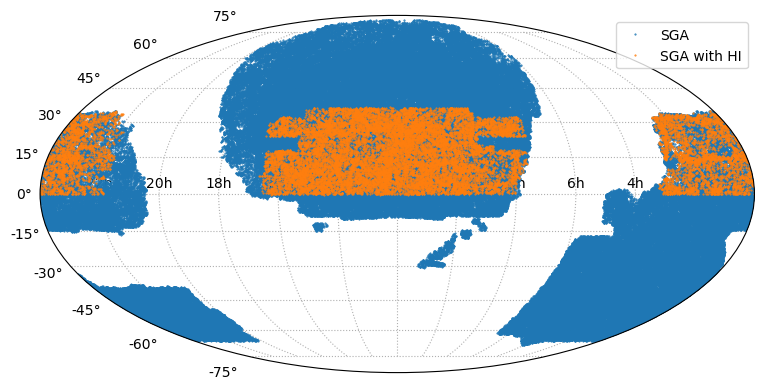

In [6]:
fig, ax = plt.subplots(figsize=(10,4), tight_layout=True, subplot_kw={'projection':'mollweide'})

# plt.plot(SGA_HI_noDESI['RA'], SGA_HI_noDESI['DEC'], '.', markersize=1, label='SGA')
# plt.plot(SGA_inDESI_noHI['RA'], SGA_inDESI_noHI['DEC'], '.', markersize=1, label='SGA in DESI')
# plt.plot(SGA_inDESI_HI['RA'], SGA_inDESI_HI['DEC'], '.', markersize=1, label='SGA in DESI with HI')

ax.plot(np.radians(180*u.deg - SGA_inDESI_noHI['RA']*u.deg), np.radians(SGA_inDESI_noHI['DEC']*u.deg), '.', markersize=1, label='SGA')
ax.plot(np.radians(180*u.deg - SGA_inDESI_HI['RA']*u.deg), np.radians(SGA_inDESI_HI['DEC']*u.deg), '.', markersize=1, label='SGA with HI')

ax.set(xticklabels=[f'{_}h' for _ in np.arange(2,24, 2)][::-1])
ax.grid(ls=':')

# plt.xlabel('ra [deg]')
# plt.ylabel('dec [deg]')

plt.legend();

# Redshift distribution

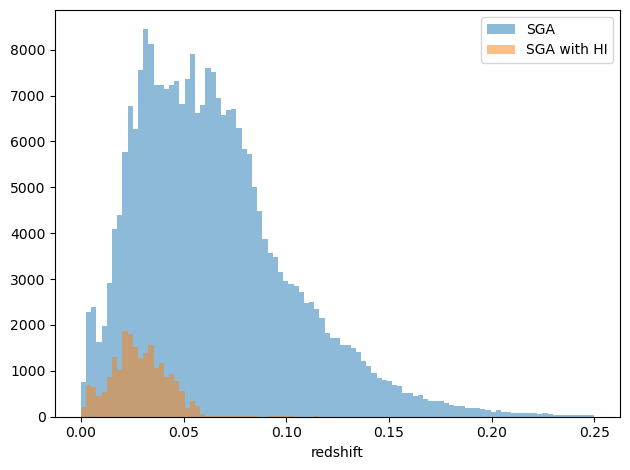

In [8]:
plt.figure(tight_layout=True)

z_bins = np.linspace(0,0.25,100)

plt.hist(SGA_HI['Z_LEDA'], bins=z_bins, alpha=0.5, label='SGA')
# plt.hist(SGA_HI_inDESI['Z_LEDA'], bins=z_bins, alpha=0.5, label='SGA in DESI')
plt.hist(SGA_inDESI_HI['Z_LEDA'], bins=z_bins, alpha=0.5, label='SGA with HI') #label='SGA in DESI with HI')

plt.xlabel('redshift')

plt.legend();

# Diameter distribution

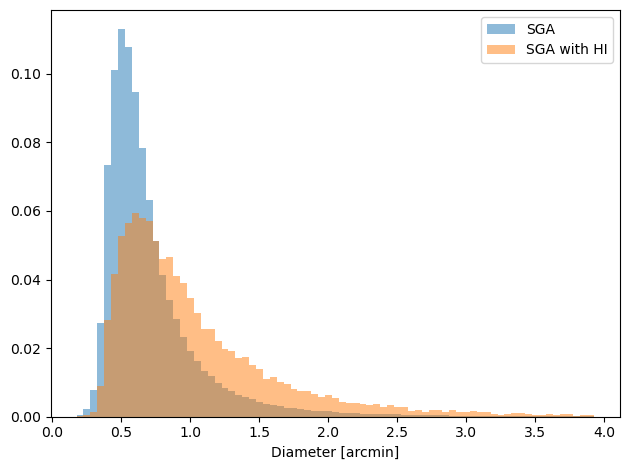

In [13]:
plt.figure(tight_layout=True)

D26_bins = np.arange(0.2,4,0.05)

bin_width = D26_bins[1] - D26_bins[0]

plt.bar(D26_bins[:-1], norm_hist(SGA_HI['D26'], D26_bins), width=bin_width, 
        alpha=0.5, label='SGA')
# plt.bar(D25_bins[:-1], norm_hist(SGA_HI_inDESI['D25_LEDA'], D25_bins), width=bin_width, 
#         alpha=0.5, label='SGA in DESI')
plt.bar(D26_bins[:-1], norm_hist(SGA_inDESI_HI['D26'], D26_bins), width=bin_width, 
        alpha=0.5, label='SGA with HI')

plt.xlabel('Diameter [arcmin]')

plt.legend();

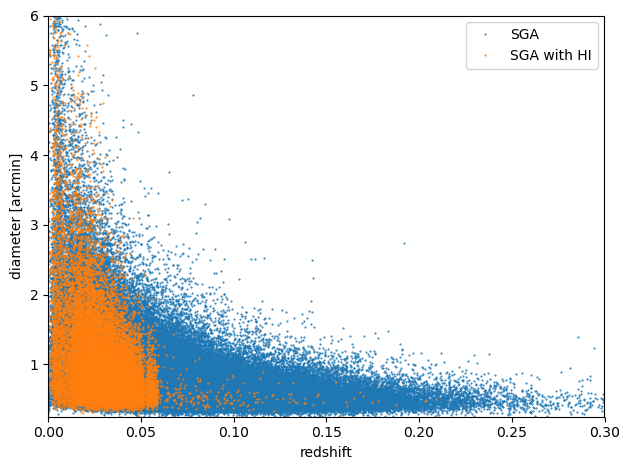

In [15]:
plt.figure(tight_layout=True)

# plt.plot(SGA_HI_noDESI['Z_LEDA'], SGA_HI_noDESI['D25_LEDA'], 
#          '.', markersize=1, label='SGA')
plt.plot(SGA_inDESI_noHI['Z_LEDA'], SGA_inDESI_noHI['D26'], 
         '.', markersize=1, label='SGA')
plt.plot(SGA_inDESI_HI['Z_LEDA'], SGA_inDESI_HI['D26'], 
         '.', markersize=1, label='SGA with HI')

plt.xlabel('redshift')
plt.ylabel('diameter [arcmin]')

plt.xlim((0,0.3))
plt.ylim((0.25,6))

plt.legend();

# Axis ratio

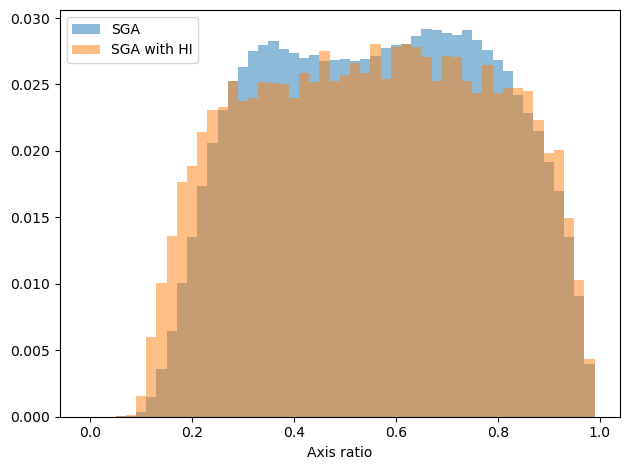

In [18]:
plt.figure(tight_layout=True)

bin_width = 0.02
ba_bins = np.arange(0,1+bin_width,bin_width)

plt.bar(ba_bins[:-1], norm_hist(SGA_HI['BA'], ba_bins), width=bin_width,
        alpha=0.5, label='SGA')
# plt.bar(ba_bins[:-1], norm_hist(SGA_HI_inDESI['BA'], ba_bins), width=bin_width, 
#         alpha=0.5, label='SGA in DESI')
plt.bar(ba_bins[:-1], norm_hist(SGA_inDESI_HI['BA'], ba_bins), width=bin_width, 
        alpha=0.5, label='SGA with HI')

plt.xlabel('Axis ratio')

plt.legend();

# Magnitude distribution

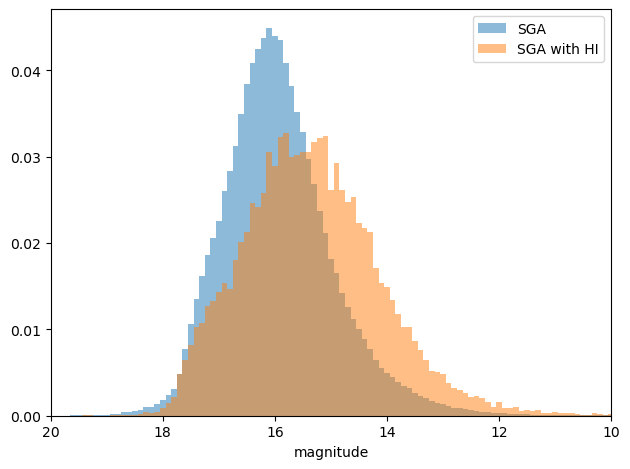

In [24]:
plt.figure(tight_layout=True)

bin_width = 0.1
m_bins = np.arange(10,20,bin_width)

plt.bar(m_bins[:-1], norm_hist(SGA_HI['R_MAG_SB26'], m_bins), width=bin_width, 
        alpha=0.5, label='SGA')
# plt.bar(m_bins[:-1], norm_hist(SGA_HI_inDESI['MAG_LEDA'], m_bins), width=bin_width, 
#         alpha=0.5, label='SGA in DESI')
plt.bar(m_bins[:-1], norm_hist(SGA_inDESI_HI['R_MAG_SB26'], m_bins), width=bin_width, 
        alpha=0.5, label='SGA with HI')

plt.xlim((20,10))

plt.xlabel('magnitude')

plt.legend();

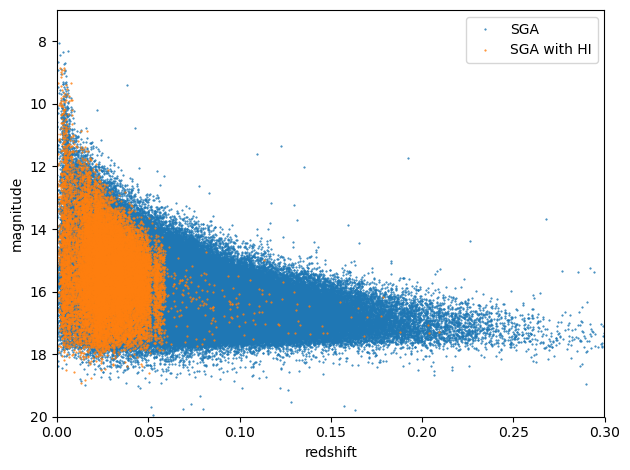

In [23]:
plt.figure(tight_layout=True)

# plt.plot(SGA_HI_noDESI['Z_LEDA'], SGA_HI_noDESI['MAG_LEDA'], 
#          '.', markersize=1, label='SGA')
plt.plot(SGA_inDESI_noHI['Z_LEDA'], SGA_inDESI_noHI['R_MAG_SB26'], 
         '.', markersize=1, label='SGA')
plt.plot(SGA_inDESI_HI['Z_LEDA'], SGA_inDESI_HI['R_MAG_SB26'], 
         '.', markersize=1, label='SGA with HI')

plt.xlabel('redshift')
plt.ylabel('magnitude')

plt.xlim((0,0.3))
plt.ylim((20,7))

plt.legend();